In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/Users/vinayshinde/Downloads/thyroid_cancer_risk_data.csv")

In [4]:
df

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [5]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


Text(0.5, 1.0, 'Distribution of Thyroid Cancer Risk')

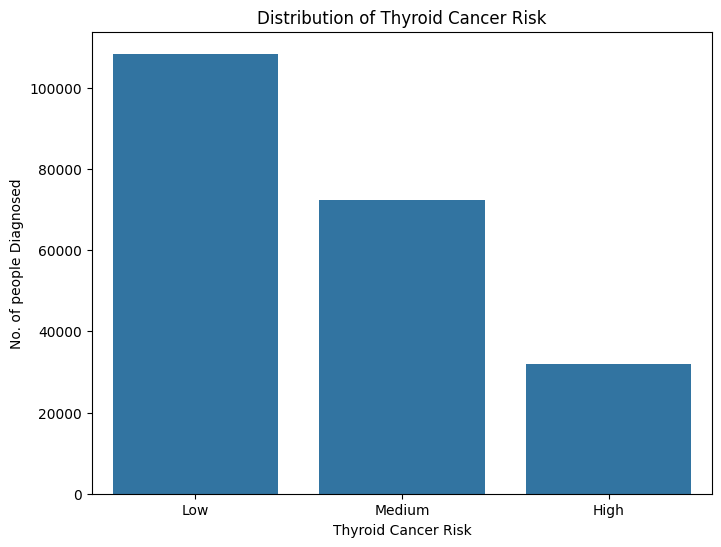

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Thyroid_Cancer_Risk')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('No. of people Diagnosed')
plt.title('Distribution of Thyroid Cancer Risk')

Text(0.5, 1.0, 'Distribution of Diagnosis')

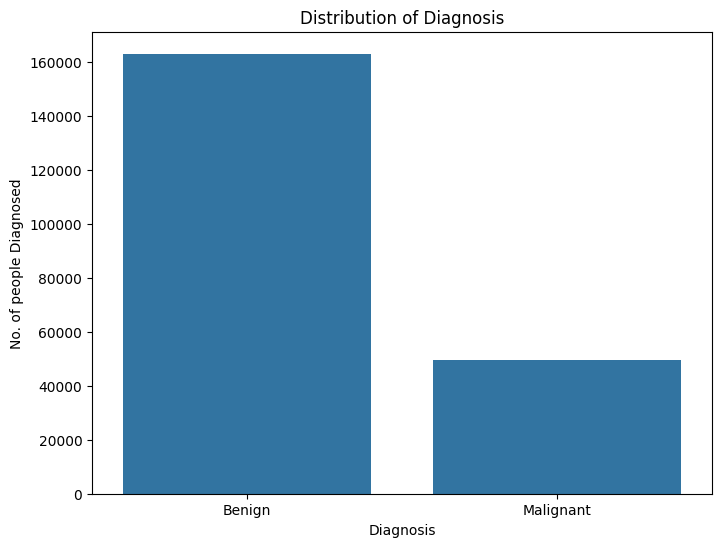

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('No. of people Diagnosed')
plt.title('Distribution of Diagnosis')

Text(0.5, 1.0, 'Distribution based on Gender')

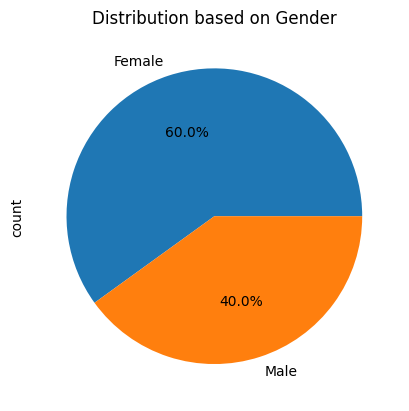

In [8]:
df['Gender'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution based on Gender')

Text(0.5, 1.0, 'Age Distribution')

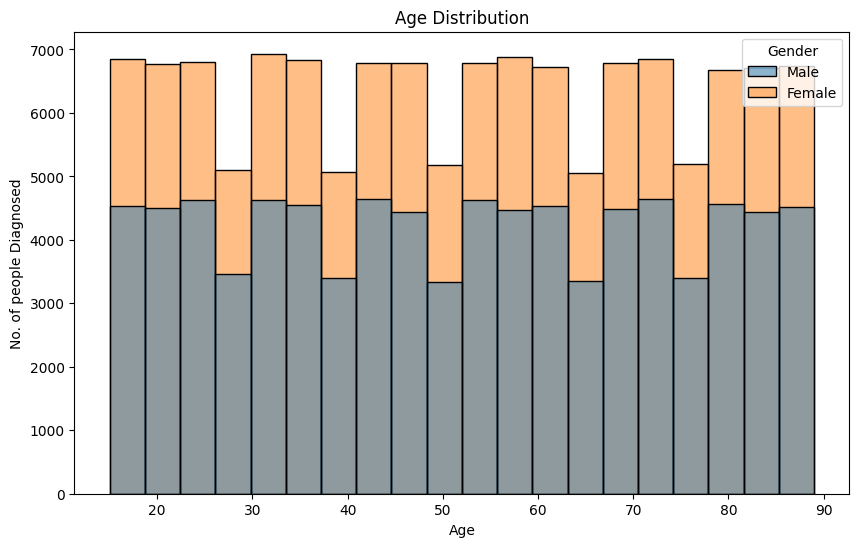

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',hue='Gender',bins=20)
plt.xlabel('Age')
plt.ylabel('No. of people Diagnosed')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Distribution of Thyroid Cancer Risk with respect to Gender')

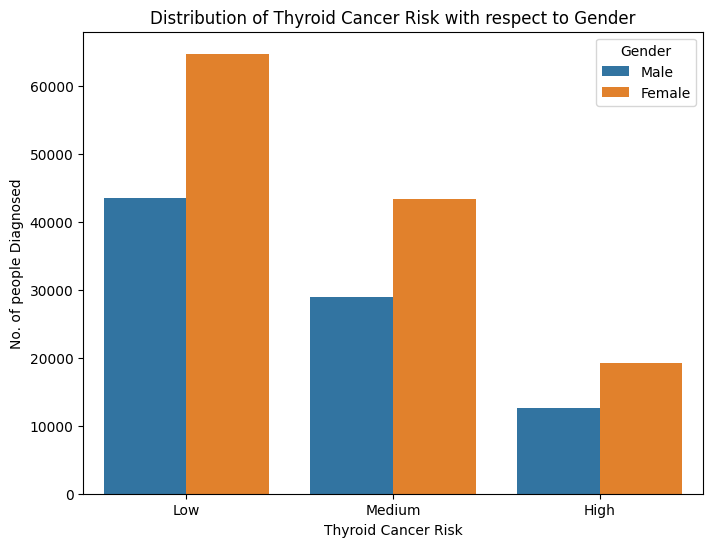

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Thyroid_Cancer_Risk',hue='Gender')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('No. of people Diagnosed')
plt.title('Distribution of Thyroid Cancer Risk with respect to Gender')

<Axes: >

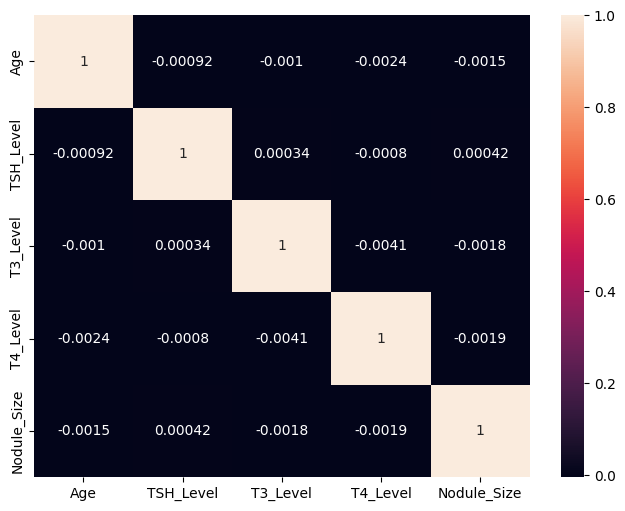

In [11]:
numerical_data = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_data].corr(),annot=True)

Text(0.5, 36.72222222222221, 'Thyroid Cancer Risk')

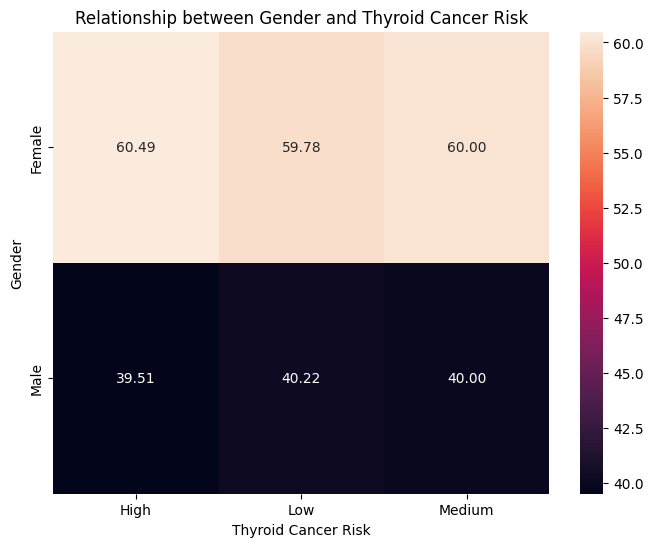

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['Gender'],df['Thyroid_Cancer_Risk'],normalize='columns')*100,annot=True,fmt=".2f")
plt.title('Relationship between Gender and Thyroid Cancer Risk')
plt.ylabel('Gender')
plt.xlabel('Thyroid Cancer Risk')

Text(0.5, 1.0, 'Relationship between Diagnosis Type and Thyroid Cancer Risk')

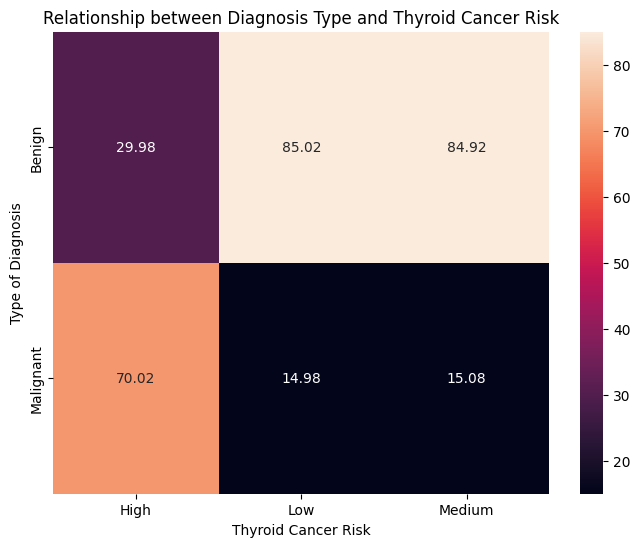

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['Diagnosis'],df['Thyroid_Cancer_Risk'],normalize='columns')*100,annot=True,fmt=".2f")
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Type of Diagnosis')
plt.title('Relationship between Diagnosis Type and Thyroid Cancer Risk')

Text(0.5, 1.0, 'Trivariate Heatmap: Diagnosis, Smoking, and Cancer Risk')

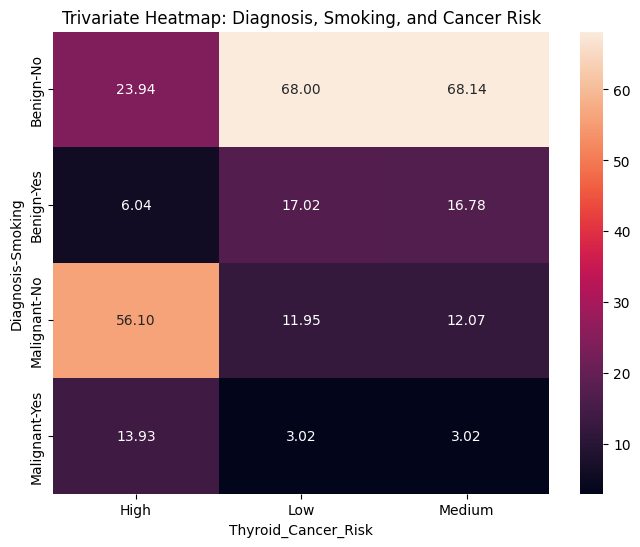

In [14]:
crosstab = pd.crosstab(index=[df['Diagnosis'], df['Smoking']], columns=df['Thyroid_Cancer_Risk'], normalize='columns') * 100

# Visualizing as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f")
plt.title("Trivariate Heatmap: Diagnosis, Smoking, and Cancer Risk")

Text(0.5, 1.0, 'Trivariate Heatmap: Diagnosis, Obesity, and Cancer Risk')

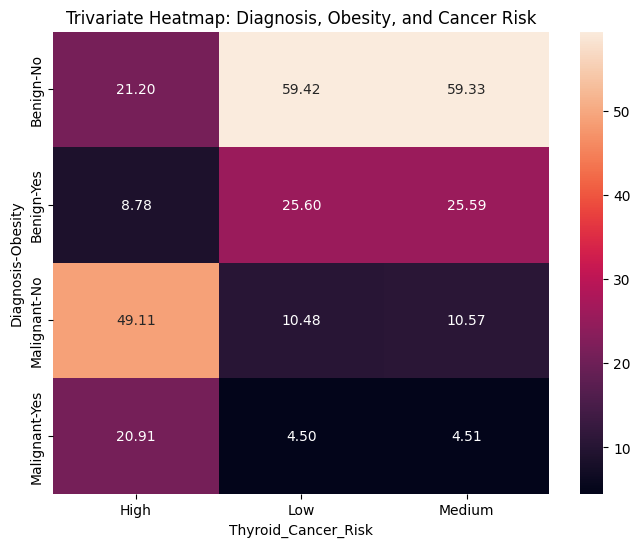

In [15]:
crosstab = pd.crosstab(index=[df['Diagnosis'], df['Obesity']], columns=df['Thyroid_Cancer_Risk'], normalize='columns') * 100

# Visualizing as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f")
plt.title("Trivariate Heatmap: Diagnosis, Obesity, and Cancer Risk")

Text(0.5, 1.0, 'Trivariate Heatmap: Diagnosis, Radiation Exposure, and Cancer Risk')

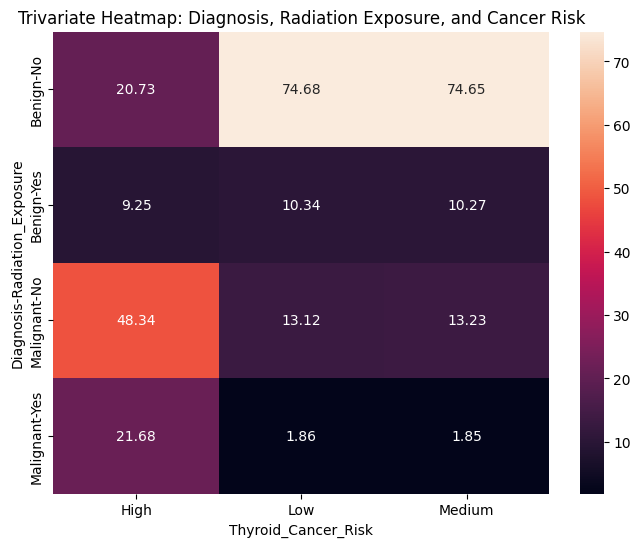

In [16]:
crosstab = pd.crosstab(index=[df['Diagnosis'], df['Radiation_Exposure']], columns=df['Thyroid_Cancer_Risk'], normalize='columns') * 100

# Visualizing as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f")
plt.title("Trivariate Heatmap: Diagnosis, Radiation Exposure, and Cancer Risk")

Text(0.5, 1.0, 'Trivariate Heatmap: Diagnosis, Diabetes, and Cancer Risk')

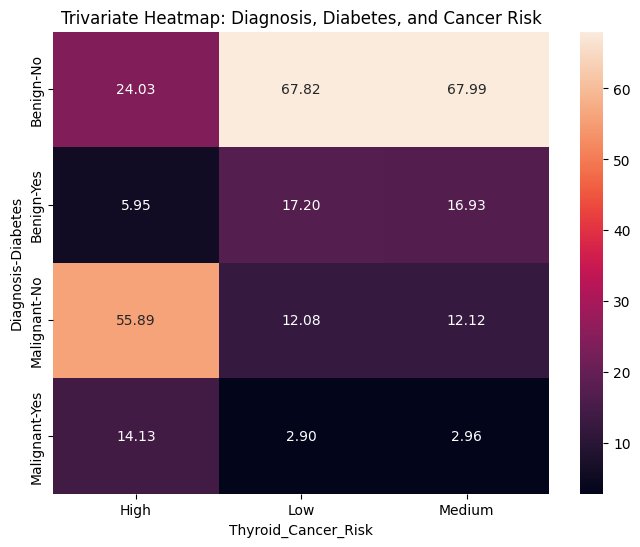

In [17]:
crosstab = pd.crosstab(index=[df['Diagnosis'], df['Diabetes']], columns=df['Thyroid_Cancer_Risk'], normalize='columns') * 100

# Visualizing as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f")
plt.title("Trivariate Heatmap: Diagnosis, Diabetes, and Cancer Risk")

Text(0.5, 1.0, 'Trivariate Heatmap: Diagnosis, Family History, and Cancer Risk')

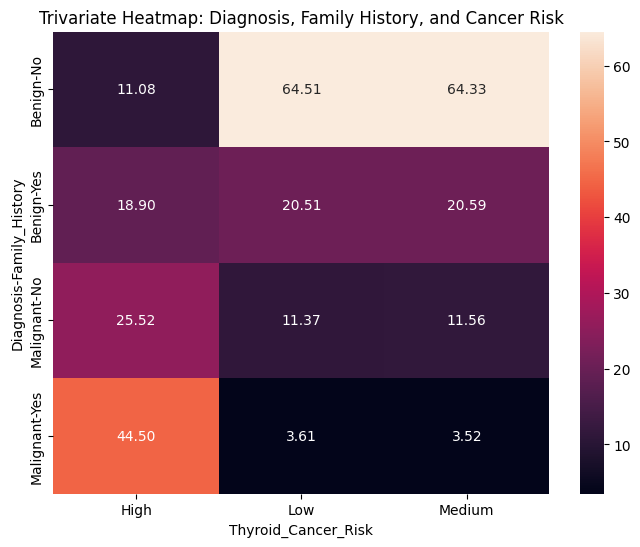

In [18]:
crosstab = pd.crosstab(index=[df['Diagnosis'], df['Family_History']], columns=df['Thyroid_Cancer_Risk'], normalize='columns') * 100

# Visualizing as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f")
plt.title("Trivariate Heatmap: Diagnosis, Family History, and Cancer Risk")

Text(0.5, 1.0, 'Trivariate Heatmap: Diagnosis, Iodine Deficiency, and Cancer Risk')

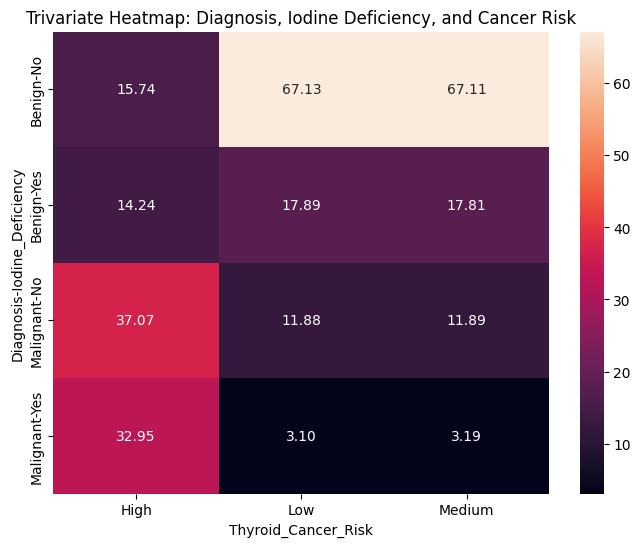

In [19]:
crosstab = pd.crosstab(index=[df['Diagnosis'], df['Iodine_Deficiency']], columns=df['Thyroid_Cancer_Risk'], normalize='columns') * 100

# Visualizing as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f")
plt.title("Trivariate Heatmap: Diagnosis, Iodine Deficiency, and Cancer Risk")

Text(0.5, 1.0, 'Relationship between Country and Thyroid Cancer Risk')

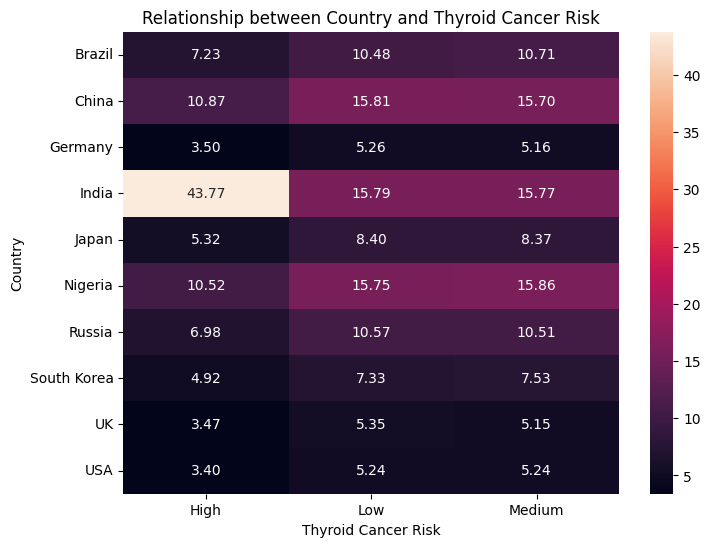

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['Country'],df['Thyroid_Cancer_Risk'],normalize='columns')*100,annot=True,fmt=".2f")
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Country')
plt.title('Relationship between Country and Thyroid Cancer Risk')

Text(0.5, 1.0, 'Relationship between Ethnicity and Thyroid Cancer Risk')

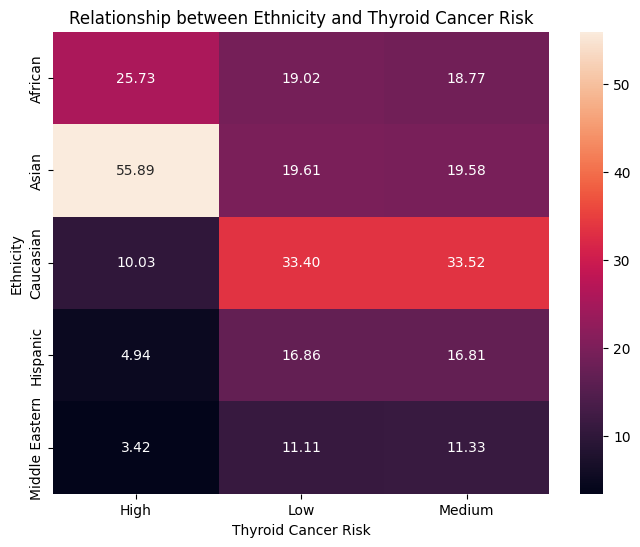

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['Ethnicity'],df['Thyroid_Cancer_Risk'],normalize='columns')*100,annot=True,fmt=".2f")
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Ethnicity')
plt.title('Relationship between Ethnicity and Thyroid Cancer Risk')

In [22]:
def transform_nodule_size(num):
      if num<1:
        return 'small'
      elif num>1 and num<2:
        return 'medium'
      else:
        return 'large'

In [23]:
df['nodule_size_range']=df['Nodule_Size'].apply(transform_nodule_size)

In [24]:
def transform_TSH_Level(num):
      if num<0.4:
       return 'low'
      elif num>0.4 and num<4:
       return 'normal'
      else:
       return 'high'

In [25]:
df['TSH_Level_range']=df['TSH_Level'].apply( transform_TSH_Level)

In [26]:
def transform_T3_Level(num):
      if num<0.8:
       return 'low'
      elif num>0.8 and num<2:
       return 'normal'
      else:
       return 'high'

In [27]:
df['T3_Level_range']=df['T3_Level'].apply( transform_T3_Level)

In [28]:
def transform_T4_Level(num):
      if num<4.5:
       return 'low'
      elif num>4.5 and num<12:
       return 'normal'
      else:
       return 'high'

In [29]:
df['T4_Level_range']=df['T4_Level'].apply( transform_T4_Level)

Text(0.5, 1.0, 'Relationship between Nodule Size and Thyroid Cancer Risk')

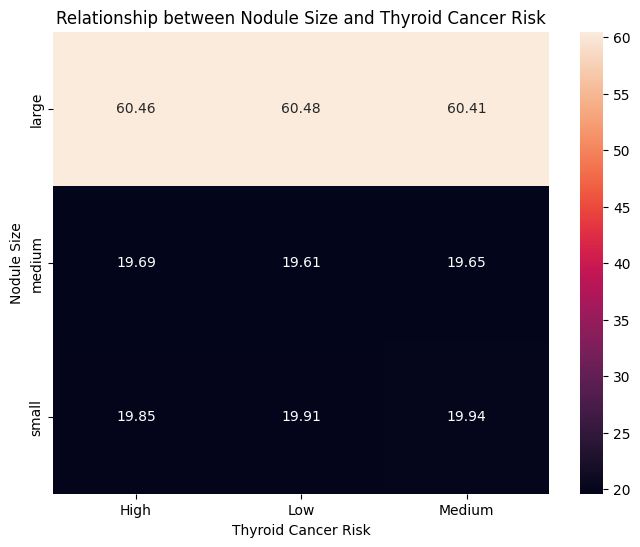

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['nodule_size_range'],df['Thyroid_Cancer_Risk'],normalize='columns')*100,annot=True,fmt='.2f')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Nodule Size')
plt.title('Relationship between Nodule Size and Thyroid Cancer Risk')

Text(0.5, 1.0, 'Relationship between TSH Level and Thyroid Cancer Risk')

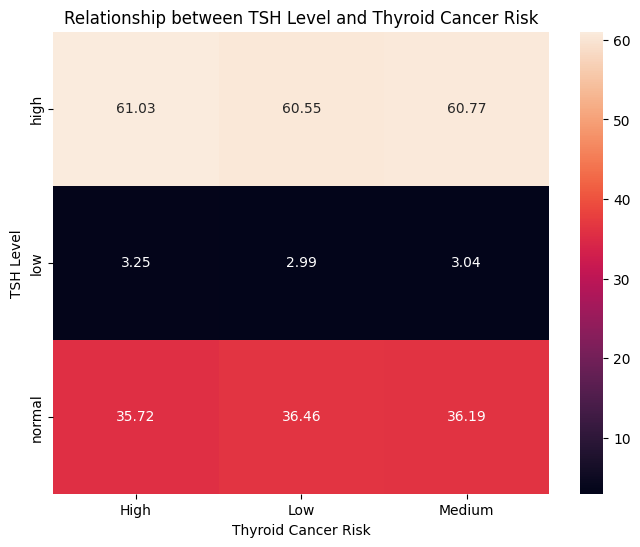

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['TSH_Level_range'],df['Thyroid_Cancer_Risk'],normalize='columns')*100,annot=True,fmt='.2f')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('TSH Level')
plt.title('Relationship between TSH Level and Thyroid Cancer Risk')

Text(0.5, 1.0, 'Relationship between T3 Level and Thyroid Cancer Risk')

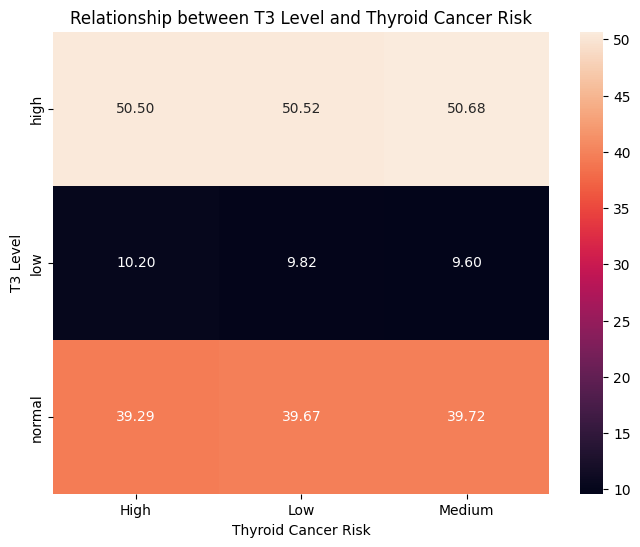

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['T3_Level_range'],df['Thyroid_Cancer_Risk'],normalize='columns')*100,annot=True,fmt='.2f')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('T3 Level')
plt.title('Relationship between T3 Level and Thyroid Cancer Risk')

Text(0.5, 1.0, 'Relationship between T4 Level and Thyroid Cancer Risk')

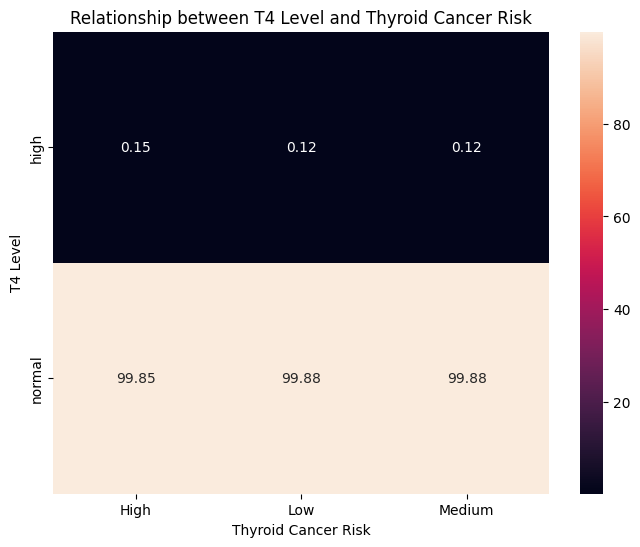

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['T4_Level_range'],df['Thyroid_Cancer_Risk'],normalize='columns')*100,annot=True,fmt='.2f')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('T4 Level')
plt.title('Relationship between T4 Level and Thyroid Cancer Risk')

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df=pd.read_csv("/Users/vinayshinde/Downloads/thyroid_cancer_risk_data.csv")

mapping_dict = {
    "Family_History": {"Yes": 1, "No": 0},
    "Radiation_Exposure": {"Yes": 1, "No": 0},
    "Iodine_Deficiency": {"Yes": 1, "No": 0},
    "Smoking": {"Yes": 1, "No": 0},
    "Obesity": {"Yes": 1, "No": 0},
    "Diabetes": {"Yes": 1, "No": 0},
    "Thyroid_Cancer_Risk": {"Low": 0, "Medium": 1, "High": 2},
    "Diagnosis": {"Benign": 0, "Malignant": 1}
}

for column, mapping in mapping_dict.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

df = df.drop(columns=["Patient_ID", "Country", "Ethnicity", "Gender"], errors='ignore')


X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

numeric_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert errors to NaN if any

# -------------------------------
# Impute missing values (if any)
# -------------------------------
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# -------------------------------
# Scale numerical features
# -------------------------------
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8251
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539


Random Forest Results:
Accuracy: 0.8236
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.44      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539


Decision Tree Results:
Accuracy: 0.7018
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     32615
           1       0.37      0.40      0.38      9924

    accuracy                           0.70     42539